In [79]:
import pandas as pd
import numpy as np
import matplotlib as plt
import requests
import glob
import json

# Gathering Data

In [80]:
t = pd.read_csv('twitter-archive-enhanced.csv')

In [81]:
url ='https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
r = requests.get(url)
with open('image-predictions.tsv','wb') as f:
    f.write(r.content)
p = pd.read_csv('image-predictions.tsv',sep='\t')

In [82]:
# json.loads func convert from json file to dictionary in python 
list = []
tweet = 'tweet-json.txt'
with open(tweet) as file :
    for i in file:
        list.append(json.loads(i))
tw = pd.DataFrame(list,columns = ['id','retweet_count','favorite_count'])

 # Assessing Data visually and Programmatically

### twitter archive enhanced data frame

In [83]:
t.head(5)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


In [84]:
t.describe()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator
count,2.356000e+03,7.800000e+01,7.800000e+01,1.810000e+02,1.810000e+02,2356.000000,2356.000000
mean,7.427716e+17,7.455079e+17,2.014171e+16,7.720400e+17,1.241698e+16,13.126486,10.455433
std,6.856705e+16,7.582492e+16,1.252797e+17,6.236928e+16,9.599254e+16,45.876648,6.745237
min,6.660209e+17,6.658147e+17,1.185634e+07,6.661041e+17,7.832140e+05,0.000000,0.000000
25%,6.783989e+17,6.757419e+17,3.086374e+08,7.186315e+17,4.196984e+09,10.000000,10.000000
50%,7.196279e+17,7.038708e+17,4.196984e+09,7.804657e+17,4.196984e+09,11.000000,10.000000
75%,7.993373e+17,8.257804e+17,4.196984e+09,8.203146e+17,4.196984e+09,12.000000,10.000000
max,8.924206e+17,8.862664e+17,8.405479e+17,8.874740e+17,7.874618e+17,1776.000000,170.000000


In [85]:
t.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

In [86]:
t[t.duplicated()]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo


In [87]:
t.isnull().sum()

tweet_id                         0
in_reply_to_status_id         2278
in_reply_to_user_id           2278
timestamp                        0
source                           0
text                             0
retweeted_status_id           2175
retweeted_status_user_id      2175
retweeted_status_timestamp    2175
expanded_urls                   59
rating_numerator                 0
rating_denominator               0
name                             0
doggo                            0
floofer                          0
pupper                           0
puppo                            0
dtype: int64

In [88]:
t['rating_numerator'].value_counts()

12      558
11      464
10      461
13      351
9       158
8       102
7        55
14       54
5        37
6        32
3        19
4        17
1         9
2         9
420       2
0         2
15        2
75        2
80        1
20        1
24        1
26        1
44        1
50        1
60        1
165       1
84        1
88        1
144       1
182       1
143       1
666       1
960       1
1776      1
17        1
27        1
45        1
99        1
121       1
204       1
Name: rating_numerator, dtype: int64

In [89]:
t['rating_denominator'].value_counts()

10     2333
11        3
50        3
80        2
20        2
2         1
16        1
40        1
70        1
15        1
90        1
110       1
120       1
130       1
150       1
170       1
7         1
0         1
Name: rating_denominator, dtype: int64

In [90]:
t.name.value_counts()

None        745
a            55
Charlie      12
Cooper       11
Lucy         11
           ... 
Vinnie        1
Stark         1
Timber        1
Leonidas      1
Bayley        1
Name: name, Length: 957, dtype: int64

## Image Prediction dataframe

In [91]:
p.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [92]:
p.describe()

,tweet_id,img_num,p1_conf,p2_conf,p3_conf
count,2.075000e+03,2075.000000,2075.000000,2.075000e+03,2.075000e+03
mean,7.384514e+17,1.203855,0.594548,1.345886e-01,6.032417e-02
std,6.785203e+16,0.561875,0.271174,1.006657e-01,5.090593e-02
min,6.660209e+17,1.000000,0.044333,1.011300e-08,1.740170e-10
25%,6.764835e+17,1.000000,0.364412,5.388625e-02,1.622240e-02
50%,7.119988e+17,1.000000,0.588230,1.181810e-01,4.944380e-02
75%,7.932034e+17,1.000000,0.843855,1.955655e-01,9.180755e-02
max,8.924206e+17,4.000000,1.000000,4.880140e-01,2.734190e-01


In [93]:
p.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [94]:
p[p.duplicated()]

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog


In [95]:
p.isnull().sum()

tweet_id    0
jpg_url     0
img_num     0
p1          0
p1_conf     0
p1_dog      0
p2          0
p2_conf     0
p2_dog      0
p3          0
p3_conf     0
p3_dog      0
dtype: int64

In [96]:
p.p3_dog.value_counts()

True     1499
False     576
Name: p3_dog, dtype: int64

In [97]:
p.img_num.value_counts()

1    1780
2     198
3      66
4      31
Name: img_num, dtype: int64

## tweet json dataframe

In [98]:
# removing records that have 0 retweet counts and favorite counts
tw.head()

,id,retweet_count,favorite_count
0,892420643555336193,8853,39467
1,892177421306343426,6514,33819
2,891815181378084864,4328,25461
3,891689557279858688,8964,42908
4,891327558926688256,9774,41048


In [99]:
tw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   id              2354 non-null   int64
 1   retweet_count   2354 non-null   int64
 2   favorite_count  2354 non-null   int64
dtypes: int64(3)
memory usage: 55.3 KB


In [100]:
tw.describe()

,id,retweet_count,favorite_count
count,2.354000e+03,2354.000000,2354.000000
mean,7.426978e+17,3164.797366,8080.968564
std,6.852812e+16,5284.770364,11814.771334
min,6.660209e+17,0.000000,0.000000
25%,6.783975e+17,624.500000,1415.000000
50%,7.194596e+17,1473.500000,3603.500000
75%,7.993058e+17,3652.000000,10122.250000
max,8.924206e+17,79515.000000,132810.000000


In [101]:
tw[tw.duplicated()]

,id,retweet_count,favorite_count


In [102]:
tw.isnull().sum()

id                0
retweet_count     0
favorite_count    0
dtype: int64

In [103]:
tw.retweet_count.value_counts()

1972     5
3652     5
83       5
146      4
61       4
        ..
8209     1
19       1
2068     1
30742    1
0        1
Name: retweet_count, Length: 1724, dtype: int64

In [104]:
tw.favorite_count.value_counts()

0        179
610        3
345        3
2918       3
1691       3
        ... 
33345      1
814        1
23108      1
2630       1
8143       1
Name: favorite_count, Length: 2007, dtype: int64

In [105]:
t_clean = t.copy()
p_clean = p.copy()
tw_clean =tw.copy()

# Cleaning

In [109]:
# Quality issue : removing the retweets (text columns starts with RT)
t_clean = t_clean[t_clean.retweeted_status_id.isnull()]
t_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2175 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2175 non-null   object 
 4   source                      2175 non-null   object 
 5   text                        2175 non-null   object 
 6   retweeted_status_id         0 non-null      float64
 7   retweeted_status_user_id    0 non-null      float64
 8   retweeted_status_timestamp  0 non-null      object 
 9   expanded_urls               2117 non-null   object 
 10  rating_numerator            2175 non-null   int64  
 11  rating_denominator          2175 non-null   int64  
 12  name                        2175 non-null   object 
 13  doggo                       2175 

In [31]:
# Quality issue : Dropping Null Columns
t_clean = t_clean.drop(['in_reply_to_status_id','in_reply_to_user_id','retweeted_status_user_id','retweeted_status_id','retweeted_status_timestamp'],axis = 1)

In [32]:
# Quality issue : source col values is the same in all records so it is useless, must be dropped
t_clean = t_clean.drop('source',axis = 1)
t_clean.head()

,tweet_id,timestamp,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,2017-08-01 16:23:56 +0000,This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,2017-08-01 00:17:27 +0000,This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,2017-07-31 00:18:03 +0000,This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,2017-07-30 15:58:51 +0000,This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,2017-07-29 16:00:24 +0000,This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


In [33]:
# Quality issue : drop rows thas has expanded_urls null values
t_clean = t_clean.dropna()

In [34]:
t_clean.head()

,tweet_id,timestamp,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,2017-08-01 16:23:56 +0000,This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,2017-08-01 00:17:27 +0000,This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,2017-07-31 00:18:03 +0000,This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,2017-07-30 15:58:51 +0000,This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,2017-07-29 16:00:24 +0000,This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


In [35]:
t_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2117 entries, 0 to 2355
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   tweet_id            2117 non-null   int64 
 1   timestamp           2117 non-null   object
 2   text                2117 non-null   object
 3   expanded_urls       2117 non-null   object
 4   rating_numerator    2117 non-null   int64 
 5   rating_denominator  2117 non-null   int64 
 6   name                2117 non-null   object
 7   doggo               2117 non-null   object
 8   floofer             2117 non-null   object
 9   pupper              2117 non-null   object
 10  puppo               2117 non-null   object
dtypes: int64(3), object(8)
memory usage: 198.5+ KB


In [36]:
# Quality issue : remove +0000 from timestamp column
t_clean.timestamp = t_clean.timestamp.str.strip('+0000')

In [37]:
t_clean.timestamp.head()

0    2017-08-01 16:23:56 
1    2017-08-01 00:17:27 
2    2017-07-31 00:18:03 
3    2017-07-30 15:58:51 
4    2017-07-29 16:00:24 
Name: timestamp, dtype: object

In [38]:
# Quality issue : converting timestamp to datetime
t_clean['timestamp'] = t_clean['timestamp'].apply(lambda x : pd.to_datetime(str(x)))

In [39]:
# tideness issue : extracting the date and time
t_clean['dates'] = t_clean['timestamp'].dt.date
t_clean['time'] =t_clean['timestamp'].dt.time

In [40]:
# Quality issue : removing the timestamp column
t_clean = t_clean.drop('timestamp',axis = 1)

In [41]:
t_clean.dates.head()

0    2017-08-01
1    2017-08-01
2    2017-07-31
3    2017-07-30
4    2017-07-29
Name: dates, dtype: object

In [42]:
t_clean.time.head()

0    16:23:56
1    00:17:27
2    00:18:03
3    15:58:51
4    16:00:24
Name: time, dtype: object

In [43]:
t_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2117 entries, 0 to 2355
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   tweet_id            2117 non-null   int64 
 1   text                2117 non-null   object
 2   expanded_urls       2117 non-null   object
 3   rating_numerator    2117 non-null   int64 
 4   rating_denominator  2117 non-null   int64 
 5   name                2117 non-null   object
 6   doggo               2117 non-null   object
 7   floofer             2117 non-null   object
 8   pupper              2117 non-null   object
 9   puppo               2117 non-null   object
 10  dates               2117 non-null   object
 11  time                2117 non-null   object
dtypes: int64(3), object(9)
memory usage: 215.0+ KB


In [44]:
t_clean.head()

,tweet_id,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,dates,time
0,892420643555336193,This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None,2017-08-01,16:23:56
1,892177421306343426,This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None,2017-08-01,00:17:27
2,891815181378084864,This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None,2017-07-31,00:18:03
3,891689557279858688,This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None,2017-07-30,15:58:51
4,891327558926688256,This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None,2017-07-29,16:00:24


In [45]:
# solving the tideness issue of the stage of DataFrame
t_clean = pd.melt(t_clean,id_vars=['tweet_id','text','expanded_urls','rating_numerator','rating_denominator','name','dates','time'],var_name='Attribute',value_name='stage')
t_clean = t_clean[t_clean.stage != "None"]
t_clean = t_clean.drop('Attribute',axis = 1)
t_clean.head(10)


,tweet_id,text,expanded_urls,rating_numerator,rating_denominator,name,dates,time,stage
9,890240255349198849,This is Cassie. She is a college pup. Studying...,https://twitter.com/dog_rates/status/890240255...,14,10,Cassie,2017-07-26,15:59:51,doggo
39,884162670584377345,Meet Yogi. He doesn't have any important dog m...,https://twitter.com/dog_rates/status/884162670...,12,10,Yogi,2017-07-09,21:29:42,doggo
86,872967104147763200,Here's a very large dog. He has a date later. ...,https://twitter.com/dog_rates/status/872967104...,12,10,None,2017-06-09,00:02:31,doggo
94,871515927908634625,This is Napolean. He's a Raggedy East Nicaragu...,https://twitter.com/dog_rates/status/871515927...,12,10,Napolean,2017-06-04,23:56:03,doggo
95,871102520638267392,Never doubt a doggo 14/10 https://t.co/AbBLh2FZCH,https://twitter.com/animalcog/status/871075758...,14,10,None,2017-06-03,20:33:19,doggo
104,869596645499047938,This is Scout. He just graduated. Officially a...,https://twitter.com/dog_rates/status/869596645...,12,10,Scout,2017-05-30,16:49:31,doggo
144,858843525470990336,I have stumbled puppon a doggo painting party....,https://twitter.com/dog_rates/status/858843525...,13,10,None,2017-05-01,00:40:27,doggo
156,855851453814013952,Here's a puppo participating in the #ScienceMa...,https://twitter.com/dog_rates/status/855851453...,13,10,None,2017-04-22,18:31:02,doggo
163,854010172552949760,"At first I thought this was a shy doggo, but i...",https://twitter.com/dog_rates/status/854010172...,11,10,None,2017-04-17,16:34:26,doggo
194,846514051647705089,This is Barney. He's an elder doggo. Hitches a...,https://twitter.com/dog_rates/status/846514051...,13,10,Barney,2017-03-28,00:07:32,doggo


In [46]:
t_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 350 entries, 9 to 7222
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   tweet_id            350 non-null    int64 
 1   text                350 non-null    object
 2   expanded_urls       350 non-null    object
 3   rating_numerator    350 non-null    int64 
 4   rating_denominator  350 non-null    int64 
 5   name                350 non-null    object
 6   dates               350 non-null    object
 7   time                350 non-null    object
 8   stage               350 non-null    object
dtypes: int64(3), object(6)
memory usage: 27.3+ KB


In [47]:
# Quality issue : removing rows that doesn't have names
t_clean = t_clean[t_clean.name != 'None']
t_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 203 entries, 9 to 7222
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   tweet_id            203 non-null    int64 
 1   text                203 non-null    object
 2   expanded_urls       203 non-null    object
 3   rating_numerator    203 non-null    int64 
 4   rating_denominator  203 non-null    int64 
 5   name                203 non-null    object
 6   dates               203 non-null    object
 7   time                203 non-null    object
 8   stage               203 non-null    object
dtypes: int64(3), object(6)
memory usage: 15.9+ KB


In [48]:
# Quality issue : I think it is a entry problem because there is not a dog called "a"
t_clean = t_clean[t_clean.name != 'a']
t_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 199 entries, 9 to 7222
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   tweet_id            199 non-null    int64 
 1   text                199 non-null    object
 2   expanded_urls       199 non-null    object
 3   rating_numerator    199 non-null    int64 
 4   rating_denominator  199 non-null    int64 
 5   name                199 non-null    object
 6   dates               199 non-null    object
 7   time                199 non-null    object
 8   stage               199 non-null    object
dtypes: int64(3), object(6)
memory usage: 15.5+ KB


In [49]:
# Quality issue : the link of the tweet in the text columns is also in expanded_urls so we removed it
t_clean['text'] = t_clean['text'].str.split("https",1).str[0]

In [50]:
t_clean['text']

9       This is Cassie. She is a college pup. Studying...
39      Meet Yogi. He doesn't have any important dog m...
94      This is Napolean. He's a Raggedy East Nicaragu...
104     This is Scout. He just graduated. Officially a...
194     This is Barney. He's an elder doggo. Hitches a...
                              ...                        
6897    This is Reginald. He's one magical puppo. Aero...
7106    This is Cooper. He's just so damn happy. 10/10...
7176    This is Abby. She got her face stuck in a glas...
7188    This is Kilo. He cannot reach the snackum. Nif...
7222    This is Bayley. She fell asleep trying to esca...
Name: text, Length: 199, dtype: object

In [51]:
# Quality issue : dropping the img_num from the dataframe
p_clean = p_clean.drop('img_num',axis=1)

In [52]:
# Quality issue : Renaming for the merging opertaion
tw_clean = tw_clean.rename({'id':'tweet_id'},axis = 1)

# Visualizations

<AxesSubplot:>

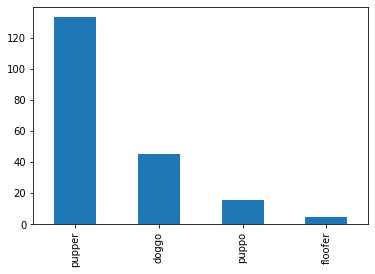

In [53]:
t_clean['stage'].value_counts().plot(kind = 'bar')

<AxesSubplot:ylabel='stage'>

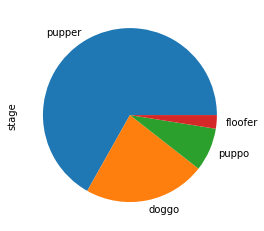

In [54]:
t_clean['stage'].value_counts().plot(kind = 'pie')

<AxesSubplot:>

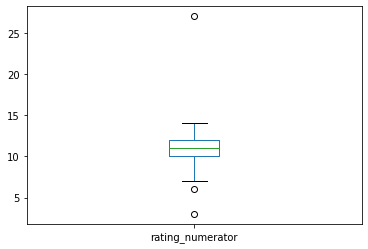

In [55]:
t_clean['rating_numerator'].plot(kind = 'box')

<AxesSubplot:>

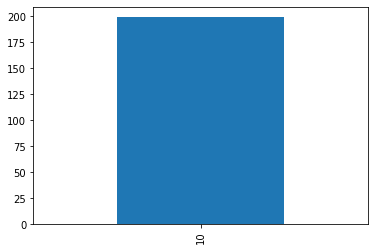

In [56]:
t_clean['rating_denominator'].value_counts().plot(kind = 'bar')

<AxesSubplot:ylabel='Frequency'>

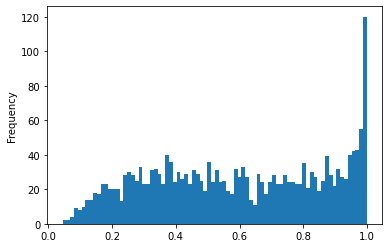

In [57]:
p_clean['p1_conf'].plot(kind = 'hist',bins = 80)

<AxesSubplot:ylabel='Frequency'>

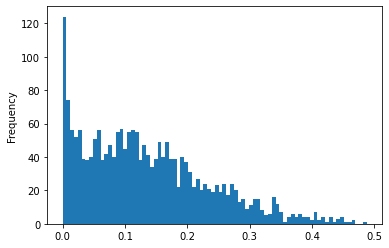

In [58]:
p_clean['p2_conf'].plot(kind = 'hist',bins = 80)

<AxesSubplot:ylabel='Frequency'>

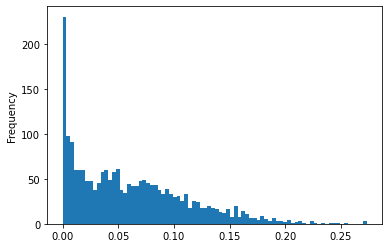

In [59]:
p_clean['p3_conf'].plot(kind = 'hist',bins = 80)

<AxesSubplot:>

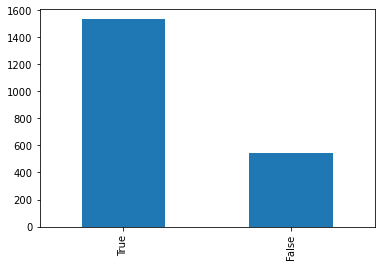

In [60]:
p_clean['p1_dog'].value_counts().plot(kind = 'bar')

<AxesSubplot:>

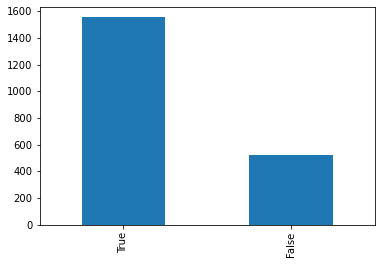

In [61]:
p_clean['p2_dog'].value_counts().plot(kind = 'bar')

<AxesSubplot:>

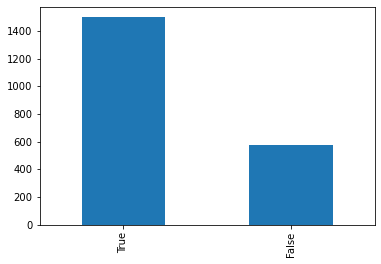

In [62]:
p_clean['p3_dog'].value_counts().plot(kind = 'bar')

In [63]:
# Quality issue : Removing the wrong predictions from the data frame
p_clean = p_clean[p_clean['p1_dog'] == True]
p_clean = p_clean[p_clean['p2_dog'] == True]
p_clean = p_clean[p_clean['p3_dog'] == True]

<AxesSubplot:ylabel='Frequency'>

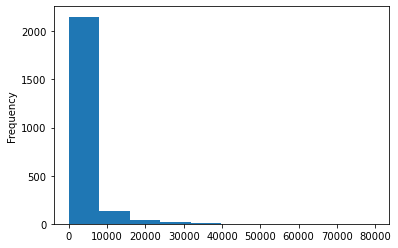

In [64]:
tw_clean.retweet_count.plot(kind='hist')

<AxesSubplot:ylabel='Frequency'>

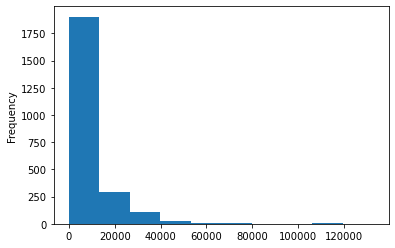

In [65]:
tw_clean.favorite_count.plot(kind='hist')

<AxesSubplot:>

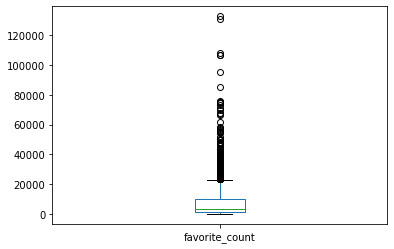

In [66]:
tw_clean.favorite_count.plot(kind='box')

<AxesSubplot:>

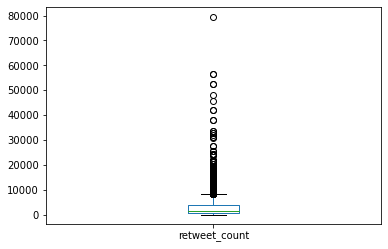

In [67]:
tw_clean.retweet_count.plot(kind='box')

# Merging the dataframes

In [71]:
# tideness issue : merging between twitter archive enhanced and image predictions data frames
twitter_archive = pd.merge(t_clean,p_clean,on='tweet_id',how = 'left')

In [72]:
twitter_archive.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 199 entries, 0 to 198
Data columns (total 19 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   tweet_id            199 non-null    int64  
 1   text                199 non-null    object 
 2   expanded_urls       199 non-null    object 
 3   rating_numerator    199 non-null    int64  
 4   rating_denominator  199 non-null    int64  
 5   name                199 non-null    object 
 6   dates               199 non-null    object 
 7   time                199 non-null    object 
 8   stage               199 non-null    object 
 9   jpg_url             120 non-null    object 
 10  p1                  120 non-null    object 
 11  p1_conf             120 non-null    float64
 12  p1_dog              120 non-null    object 
 13  p2                  120 non-null    object 
 14  p2_conf             120 non-null    float64
 15  p2_dog              120 non-null    object 
 16  p3      

In [73]:
# tideness issue : merging between twitter archive  and tweet-json data frames
twitter_archive_master = pd.merge(twitter_archive,tw_clean,on='tweet_id',how = 'left')

In [74]:
twitter_archive_master.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 199 entries, 0 to 198
Data columns (total 21 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   tweet_id            199 non-null    int64  
 1   text                199 non-null    object 
 2   expanded_urls       199 non-null    object 
 3   rating_numerator    199 non-null    int64  
 4   rating_denominator  199 non-null    int64  
 5   name                199 non-null    object 
 6   dates               199 non-null    object 
 7   time                199 non-null    object 
 8   stage               199 non-null    object 
 9   jpg_url             120 non-null    object 
 10  p1                  120 non-null    object 
 11  p1_conf             120 non-null    float64
 12  p1_dog              120 non-null    object 
 13  p2                  120 non-null    object 
 14  p2_conf             120 non-null    float64
 15  p2_dog              120 non-null    object 
 16  p3      

In [75]:
# removing null values from twitter_archive_master dataframe
twitter_archive_master = twitter_archive_master.dropna()

In [76]:
twitter_archive_master.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 120 entries, 0 to 197
Data columns (total 21 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   tweet_id            120 non-null    int64  
 1   text                120 non-null    object 
 2   expanded_urls       120 non-null    object 
 3   rating_numerator    120 non-null    int64  
 4   rating_denominator  120 non-null    int64  
 5   name                120 non-null    object 
 6   dates               120 non-null    object 
 7   time                120 non-null    object 
 8   stage               120 non-null    object 
 9   jpg_url             120 non-null    object 
 10  p1                  120 non-null    object 
 11  p1_conf             120 non-null    float64
 12  p1_dog              120 non-null    object 
 13  p2                  120 non-null    object 
 14  p2_conf             120 non-null    float64
 15  p2_dog              120 non-null    object 
 16  p3      

In [77]:

twitter_archive_master.to_csv(r'C:\Users\EGYPT_LAPTOP\Desktop\Second Project\twitter_archive_master.csv', index = False)